### Afficher un échantillon d’images pour chaque classe avec les boîtes englobantes.

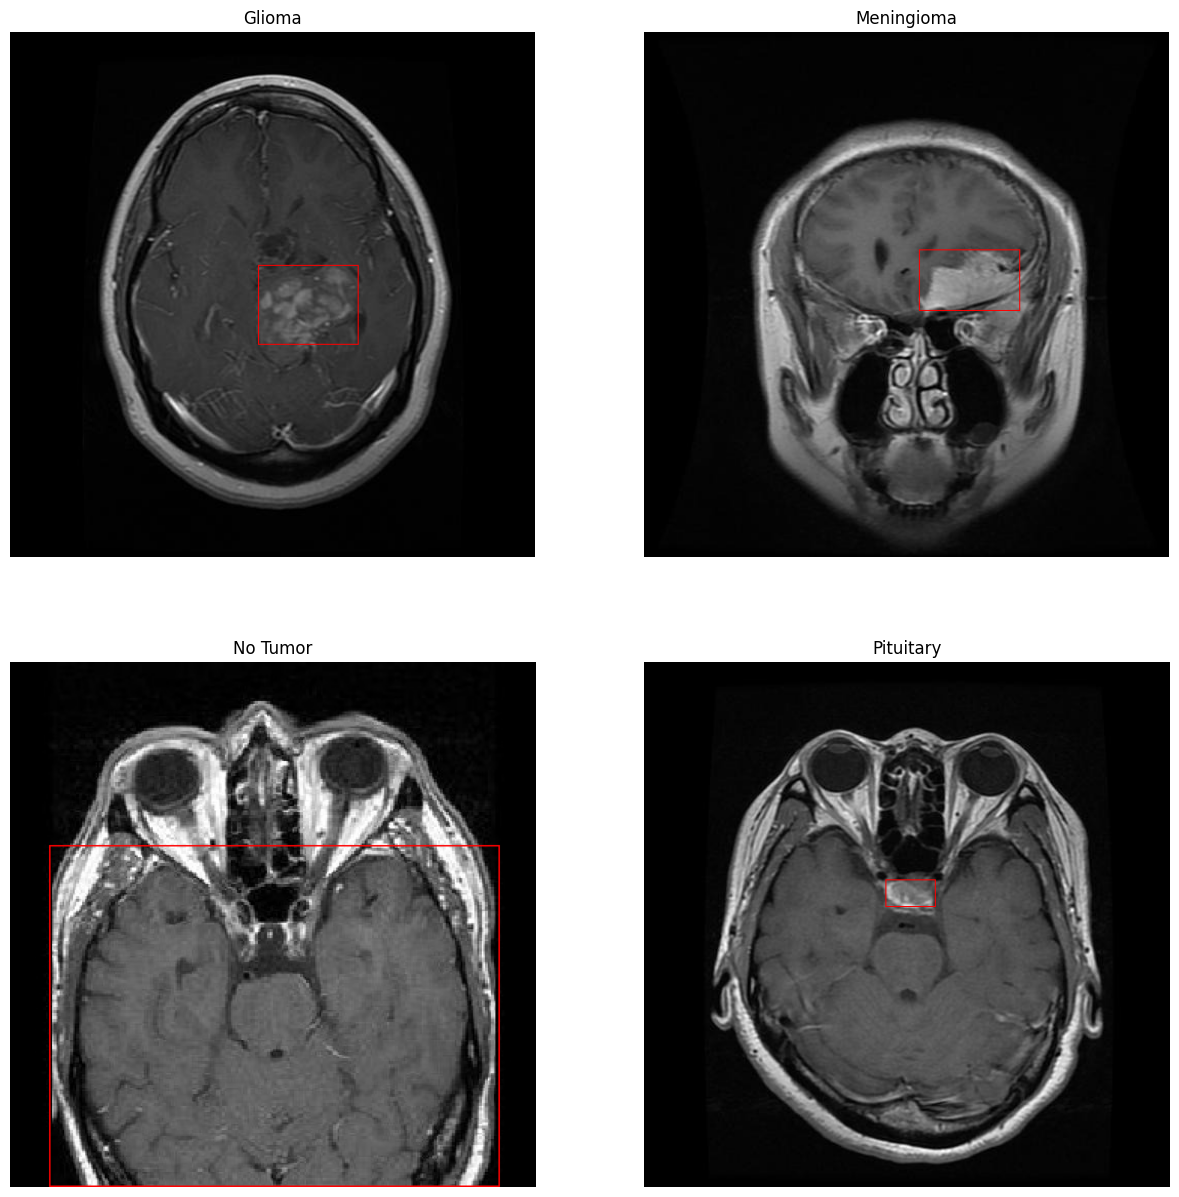

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

image1_path = '../data/raw/Data_Brain/Train/Glioma/images/gg (1).jpg'
image2_path = '../data/raw/Data_Brain/Train/Meningioma/images/m (2).jpg'
image3_path = '../data/raw/Data_Brain/Train/No Tumor/images/1.jpg'
image4_path = '../data/raw/Data_Brain/Train/Pituitary/images/p (1).jpg'

data_path = '../data/raw/Data_Brain/Train'

plt.figure(figsize=(15, 15))
i = 1

for folder in os.listdir(data_path):
    images_path = os.path.join(data_path, folder, 'images')
    labels_path = os.path.join(data_path, folder, 'labels')

    for image in os.listdir(images_path)[:1]:

        image_label = os.path.join(labels_path, os.path.splitext(image)[0] + '.txt')

        if os.path.exists(image_label):
            img = cv2.imread(images_path + '/' + image)
            image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            file = open(image_label)
            coords = file.readlines()

            height, width, channels = img.shape

            for c in coords:
                c_list = list(map(float, c.split(' ')))

                rec_width = height * c_list[3]
                rec_height = height * c_list[4]
                x_center = width * c_list[1]
                y_center = height * c_list[2]

                x_min = int(x_center - rec_width / 2)
                y_min = int(y_center - rec_height / 2)
                x_max = int(x_center + rec_width / 2)
                y_max = int(y_center + rec_height / 2)

                cv2.rectangle(image_rgb, (x_min, y_min), (x_max, y_max), (255, 0, 0), 1)


            plt.subplot(2, 2, i)
            plt.imshow(image_rgb)
            plt.title(folder)
            plt.axis('off')
            i += 1

            
    
plt.show()



### Créer un dossier pour stocker les données après filtrage.

In [49]:
import os

dir_path = "../data/processed/Data_Brain"

try:
    os.mkdir(dir_path)
except:
    print("Directory already exists")

Directory already exists


### Pour chaque image : Vérifier si un fichier .txt correspondant existe.

- Si oui : copier l’image et le label vers les dossiers outputpath/images/ et outputpath/labels/ (train, valid, test).

- Si non : afficher un message d’avertissement et ignorer l’image.

In [59]:
import shutil

raw_data_path = "../data/raw/Data_Brain"
processed_data_path = '../data/processed/Data_Brain'

data_folders = os.listdir(raw_data_path)

# For each folder Train + Val
for folder in data_folders:
    data_folder_path = os.path.join(raw_data_path, folder)
    data_processed_folder_path = os.path.join(processed_data_path, folder)

    os.makedirs(os.path.join(data_processed_folder_path, 'images'))
    os.makedirs(os.path.join(data_processed_folder_path, 'labels'))

    categories = data_folders = os.listdir(data_folder_path)

    # For each class among the 4 classes
    for category in categories:
        category_folder_path = os.path.join(data_folder_path, category)
        
        try:
            images_folder = os.path.join(category_folder_path, 'images')
            labels_folder = os.path.join(category_folder_path, 'labels')
        except:
            pass

        # For each image
        for image in os.listdir(images_folder):

            image_name = os.path.splitext(image)[0]

            if os.path.exists(f"{labels_folder}/{image_name}.txt"):

                # Copy image
                image_source = os.path.join(images_folder, image)
                image_destination = os.path.join(data_processed_folder_path, 'images', image)

                # Copy Label
                label_source = os.path.join(labels_folder, image_name + '.txt')
                label_destination = os.path.join(data_processed_folder_path, 'labels', image_name + '.txt')

                shutil.copy(image_source, image_destination)
                shutil.copy(label_source, label_destination)
            else:
                print("The image", image, "does not have a label")

The image image(55).jpg does not have a label
The image image(61).jpg does not have a label


#### Les classes:

In [61]:
raw_data_path = "../data/raw/Data_Brain"

data_folders = os.listdir(raw_data_path)[0]

data_folder_path = os.path.join(raw_data_path, data_folders)

classes = data_folders = os.listdir(data_folder_path)

print(classes)

['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']


### Compter le nombre d’images et d’étiquettes dans les ensembles train/valid.

In [3]:
import os

processed_data_path = '../data/processed/Data_Brain'

data_folders = os.listdir(processed_data_path)

counts = []

for folder in data_folders:
    images_folder_path = os.path.join(processed_data_path, folder, 'images')
    labels_folder_path = os.path.join(processed_data_path, folder, 'labels')

    images_count = len(os.listdir(images_folder_path))
    labels_count = len(os.listdir(labels_folder_path))

    print('Image\'s Count in', folder, ':', images_count)
    print('Label\'s Count in', folder, ':', labels_count)

    counts.append(images_count)
    counts.append(labels_count)


Image's Count in Train : 4737
Label's Count in Train : 4737
Image's Count in Val : 510
Label's Count in Val : 510


- En percentages:

In [10]:
total = counts[0] + counts[2]

print(f'Train : {counts[0] / total :.2f}%')
print(f"Val   : {(counts[2] / total) :.2f}%")

Train : 0.90%
Val   : 0.10%


### Lancer l’entraînement du modèle avec les hyperparamètres appropriés.

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data="../data2.yaml",
    epochs=100,
    batch=32,
    imgsz=640,
    lr0=0.001,
    optimizer='Adam',
    weight_decay=0.0005,
    patience=10,
    freeze=0,
    augment=True,
    flipud=0.0,
    fliplr=0.5,
    hsv_h=0.0,
    hsv_s=0.0,
    hsv_v=0.1,
    mosaic=0,
    mixup=0,
    project="../models/",
    name="brain_tumor_model",
    exist_ok=True
)